     -------------------------------------- 101.2/101.2 MB 3.8 MB/s eta 0:00:00
     ---------------------------------------- 47.1/47.1 kB 2.5 MB/s eta 0:00:00


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, recall_score, precision_score, f1_score, cohen_kappa_score, matthews_corrcoef
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import lightgbm as lgb
from catboost import CatBoostClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import time

In [25]:
# Load the dataset
water_potability_df = pd.read_csv('water_potability.csv')

# Get the number of rows and columns in the dataset
rows, columns = water_potability_df.shape

# Output the dimensions of the dataset
print(f"Dataset Dimensions: {rows} rows, {columns} columns")

# Preview the first few entries in the dataset to understand its structure and contents
print(water_potability_df.head())

Dataset Dimensions: 3276 rows, 10 columns
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


In [26]:
# Display basic information about the dataset
print(water_potability_df.info())
print(water_potability_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None
                ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085 

In [27]:
# Check for missing values
print(water_potability_df.isnull().sum())

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [28]:
# Handle missing values (for demonstration, we'll fill missing values with the mean)
water_potability_df.fillna(water_potability_df.mean(), inplace=True)

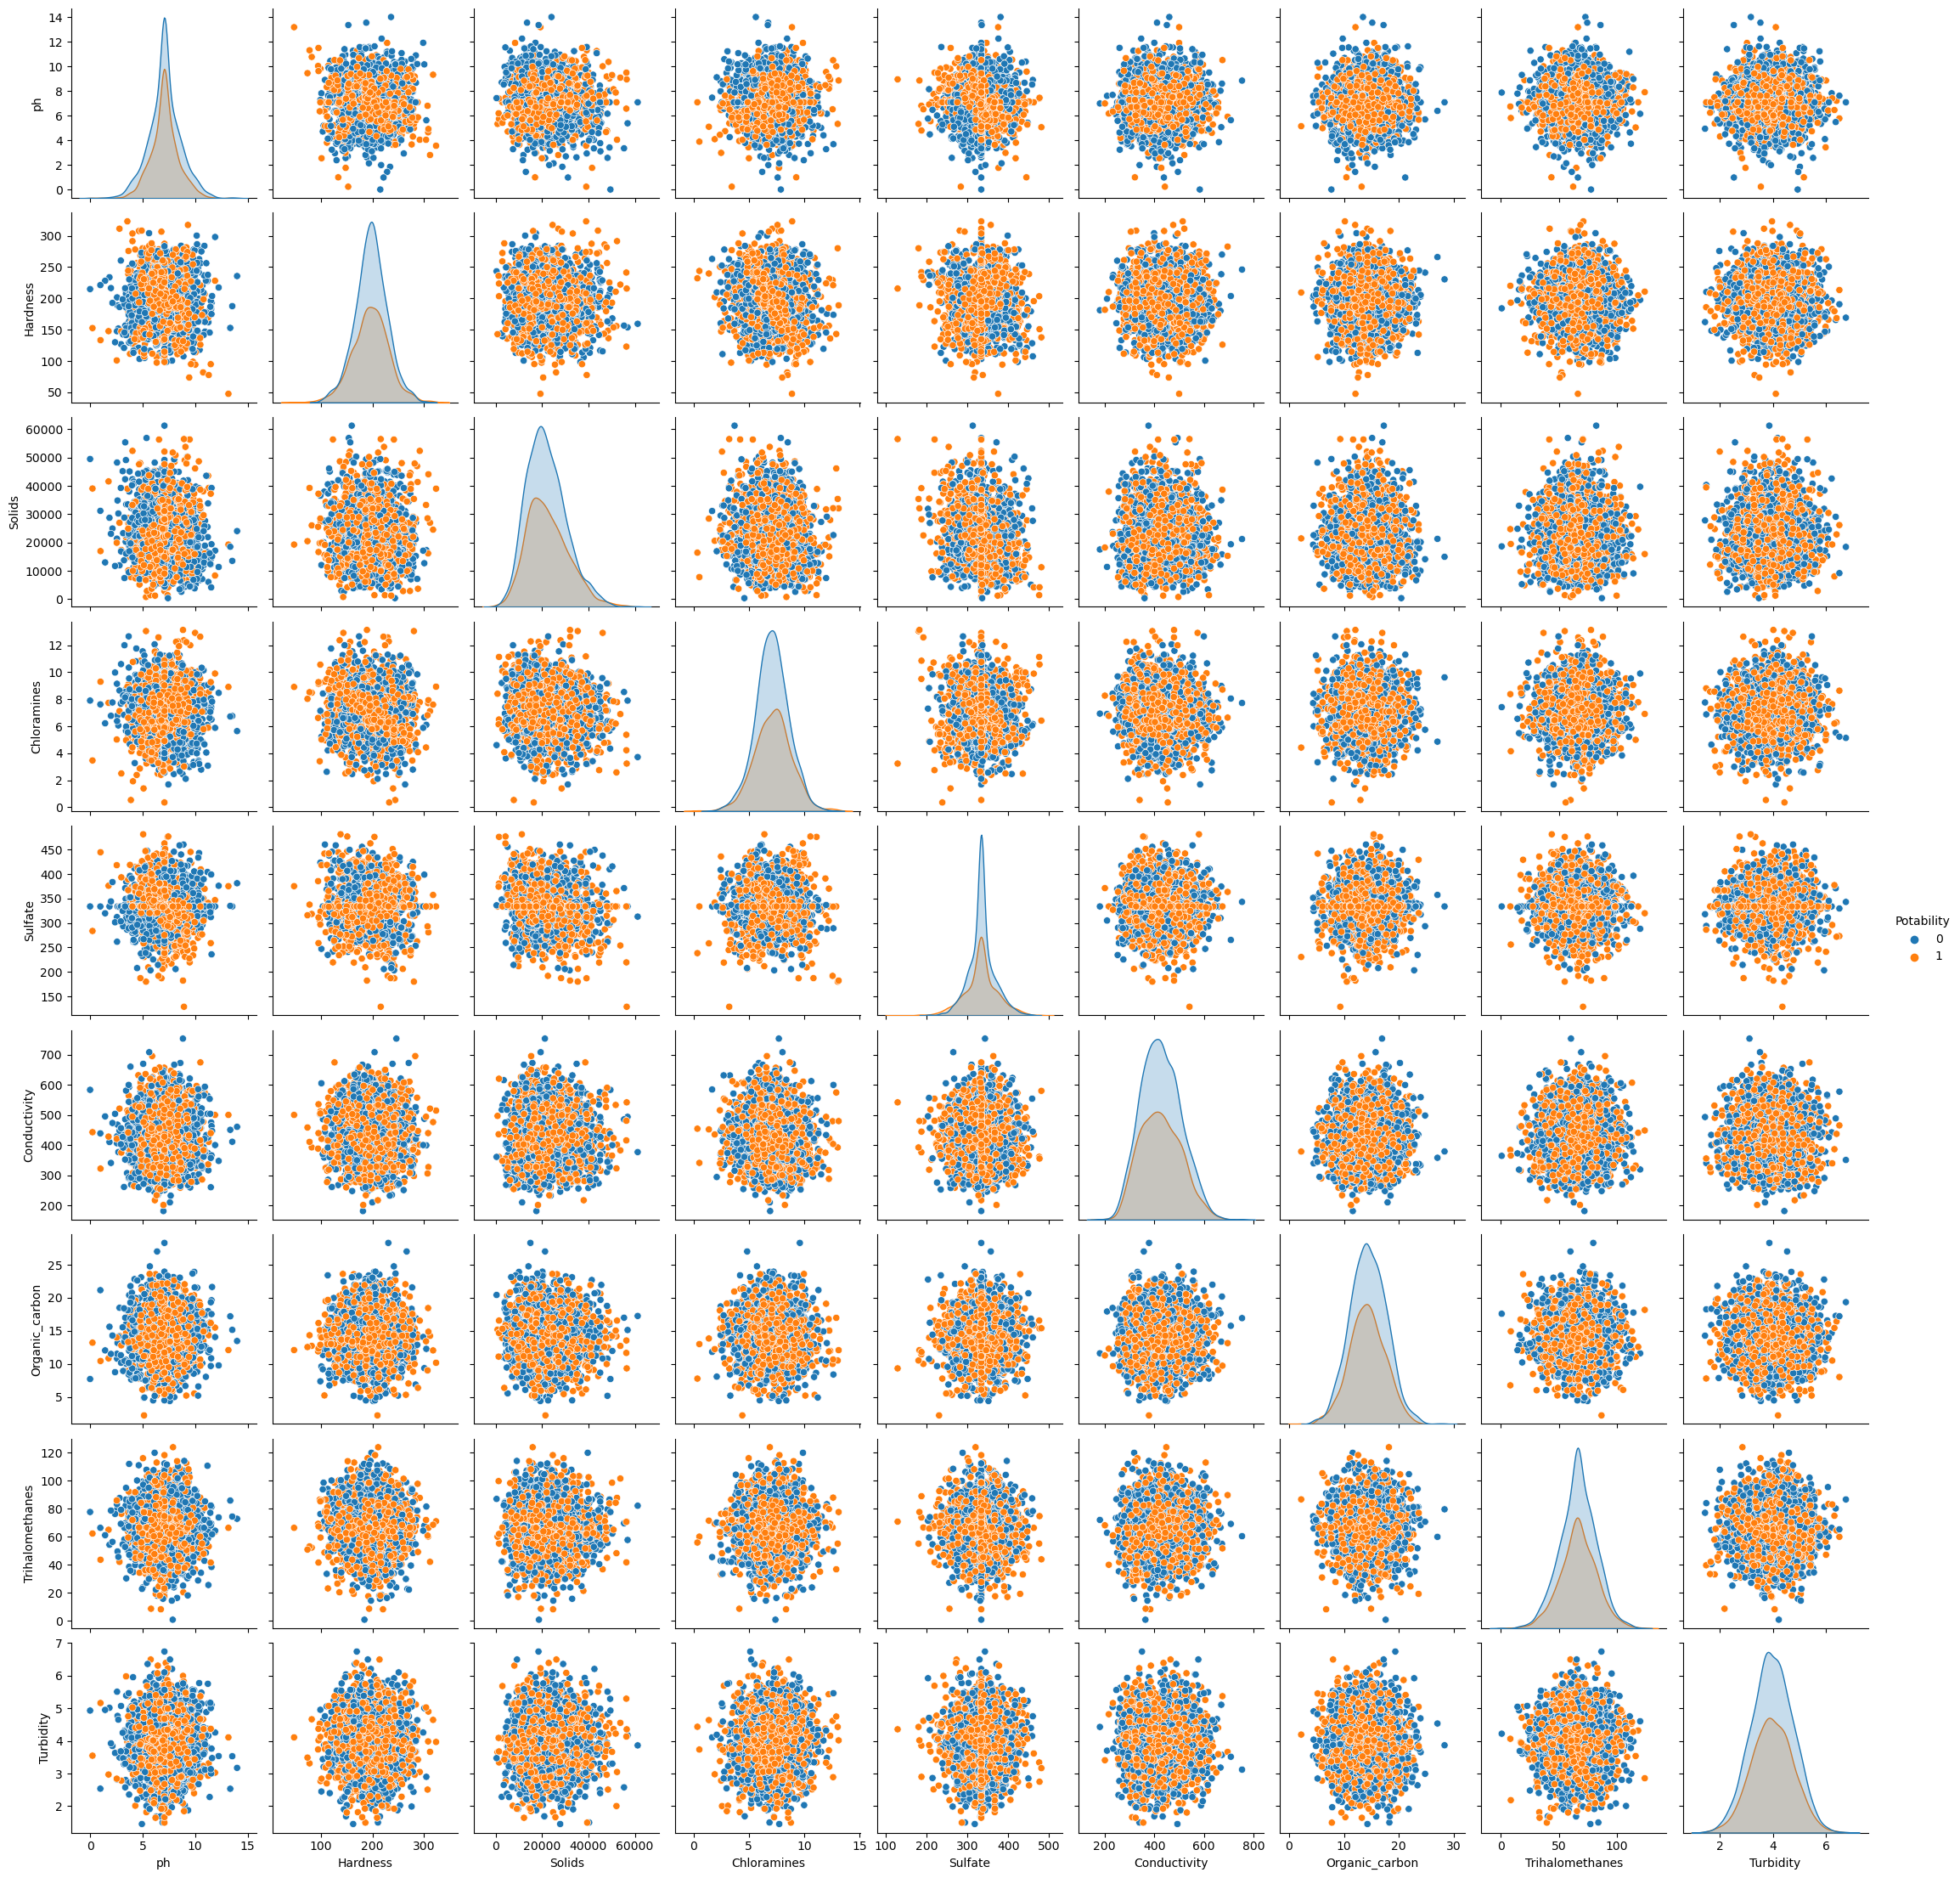

In [29]:
# Exploratory Data Analysis (EDA)
# Pairplot to visualize relationships between variables
sns.pairplot(water_potability_df, hue='Potability')
plt.show()

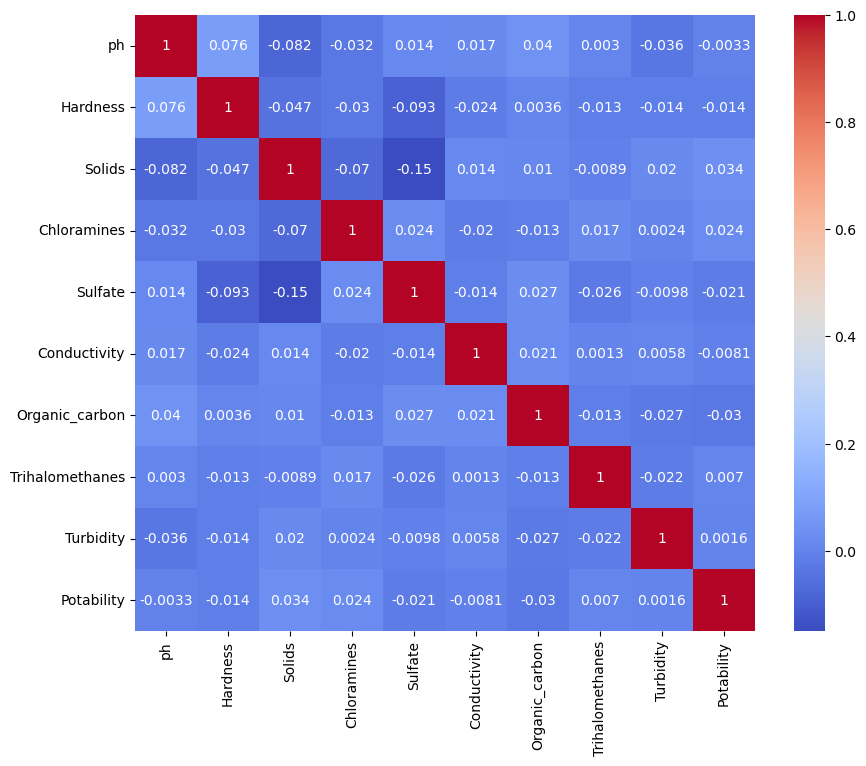

In [30]:
# Correlation matrix
corr_matrix = water_potability_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

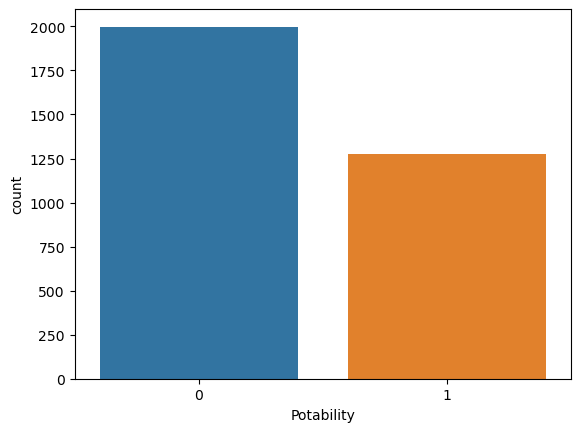

In [31]:
# Distribution of Potability
sns.countplot(x='Potability', data=water_potability_df)
plt.show()

In [32]:
# Splitting the data into training and testing sets
X = water_potability_df.drop('Potability', axis=1)
y = water_potability_df['Potability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
# Model Building and Evaluation

# 1. Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print(confusion_matrix(y_test, svm_pred))
print(classification_report(y_test, svm_pred))

SVM Accuracy: 0.6951219512195121
[[378  34]
 [166  78]]
              precision    recall  f1-score   support

           0       0.69      0.92      0.79       412
           1       0.70      0.32      0.44       244

    accuracy                           0.70       656
   macro avg       0.70      0.62      0.61       656
weighted avg       0.70      0.70      0.66       656



In [35]:
# 2. K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))
print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

KNN Accuracy: 0.6280487804878049
[[310 102]
 [142 102]]
              precision    recall  f1-score   support

           0       0.69      0.75      0.72       412
           1       0.50      0.42      0.46       244

    accuracy                           0.63       656
   macro avg       0.59      0.59      0.59       656
weighted avg       0.62      0.63      0.62       656



In [36]:
# 3. Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print(confusion_matrix(y_test, dt_pred))
print(classification_report(y_test, dt_pred))

Decision Tree Accuracy: 0.5685975609756098
[[248 164]
 [119 125]]
              precision    recall  f1-score   support

           0       0.68      0.60      0.64       412
           1       0.43      0.51      0.47       244

    accuracy                           0.57       656
   macro avg       0.55      0.56      0.55       656
weighted avg       0.59      0.57      0.57       656



In [37]:
# 4. Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

Random Forest Accuracy: 0.6798780487804879
[[363  49]
 [161  83]]
              precision    recall  f1-score   support

           0       0.69      0.88      0.78       412
           1       0.63      0.34      0.44       244

    accuracy                           0.68       656
   macro avg       0.66      0.61      0.61       656
weighted avg       0.67      0.68      0.65       656



In [38]:
# 5. CatBoost
catboost_model = CatBoostClassifier(verbose=0)
catboost_model.fit(X_train, y_train)
catboost_pred = catboost_model.predict(X_test)
print("CatBoost Accuracy:", accuracy_score(y_test, catboost_pred))
print(confusion_matrix(y_test, catboost_pred))
print(classification_report(y_test, catboost_pred))

CatBoost Accuracy: 0.6783536585365854
[[362  50]
 [161  83]]
              precision    recall  f1-score   support

           0       0.69      0.88      0.77       412
           1       0.62      0.34      0.44       244

    accuracy                           0.68       656
   macro avg       0.66      0.61      0.61       656
weighted avg       0.67      0.68      0.65       656



In [41]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Initialize base classifiers
base_classifiers = [
    ('random_forest', RandomForestClassifier()),
    ('decision_tree', DecisionTreeClassifier()),
    ('knn', KNeighborsClassifier())
]

# Initialize stacking classifier with CatBoost as the final estimator
stacking_model = StackingClassifier(estimators=base_classifiers, final_estimator=CatBoostClassifier(verbose=0))

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Predict with the stacking model
stacking_pred = stacking_model.predict(X_test)

# Evaluate performance
print("Stacking Model Accuracy:", accuracy_score(y_test, stacking_pred))
print(confusion_matrix(y_test, stacking_pred))
print(classification_report(y_test, stacking_pred))


Stacking Model Accuracy: 0.6737804878048781
[[357  55]
 [159  85]]
              precision    recall  f1-score   support

           0       0.69      0.87      0.77       412
           1       0.61      0.35      0.44       244

    accuracy                           0.67       656
   macro avg       0.65      0.61      0.61       656
weighted avg       0.66      0.67      0.65       656



In [39]:
# 6. LightGBM
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)
print("LightGBM Accuracy:", accuracy_score(y_test, lgb_pred))
print(confusion_matrix(y_test, lgb_pred))
print(classification_report(y_test, lgb_pred))


[LightGBM] [Info] Number of positive: 1034, number of negative: 1586
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000338 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 2620, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.394656 -> initscore=-0.427780
[LightGBM] [Info] Start training from score -0.427780
LightGBM Accuracy: 0.6783536585365854
[[340  72]
 [139 105]]
              precision    recall  f1-score   support

           0       0.71      0.83      0.76       412
           1       0.59      0.43      0.50       244

    accuracy                           0.68       656
   macro avg       0.65      0.63      0.63       656
weighted avg       0.67      0.68      0.66       656



In [40]:
# 5. Neural Network
nn_model = Sequential()
nn_model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(Dense(16, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))

nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1)
nn_pred = (nn_model.predict(X_test) > 0.5).astype("int32")

print("Neural Network Accuracy:", accuracy_score(y_test, nn_pred))
print(confusion_matrix(y_test, nn_pred))
print(classification_report(y_test, nn_pred))

Epoch 1/50
262/262 [==============================] - 1s 2ms/step - loss: 0.6778 - accuracy: 0.5851
Epoch 2/50
262/262 [==============================] - 0s 2ms/step - loss: 0.6499 - accuracy: 0.6298
Epoch 3/50
262/262 [==============================] - 0s 2ms/step - loss: 0.6302 - accuracy: 0.6531
Epoch 4/50
262/262 [==============================] - 0s 2ms/step - loss: 0.6129 - accuracy: 0.6733
Epoch 5/50
262/262 [==============================] - 0s 2ms/step - loss: 0.6016 - accuracy: 0.6840
Epoch 6/50
262/262 [==============================] - 0s 2ms/step - loss: 0.5924 - accuracy: 0.6863
Epoch 7/50
262/262 [==============================] - 1s 2ms/step - loss: 0.5850 - accuracy: 0.6966
Epoch 8/50
262/262 [==============================] - 1s 2ms/step - loss: 0.5828 - accuracy: 0.6927
Epoch 9/50
262/262 [==============================] - 1s 2ms/step - loss: 0.5768 - accuracy: 0.6996
Epoch 10/50
262/262 [==============================] - 1s 2ms/step - loss: 0.5727 - accuracy: 0.6992

Dataset Dimensions: 3276 rows, 10 columns
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  
Evaluation for SVM (without tuning):
Accuracy: 0.6595
Precision: 0.6141
Recall: 0.8248
F1-Score: 0.7040
Kappa: 0.3229

C:\Users\shant\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for SVM: {'kernel': 'rbf', 'C': 10}
Best cross-validation score for SVM: 0.6759257524038997

Training KNN...


C:\Users\shant\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for KNN: {'weights': 'distance', 'n_neighbors': 3}
Best cross-validation score for KNN: 0.6523209066773754

Training Decision Tree...


C:\Users\shant\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for Decision Tree: {'min_samples_split': 2, 'max_depth': None}
Best cross-validation score for Decision Tree: 0.5961760703210406

Training Random Forest...


C:\Users\shant\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for Random Forest: {'n_estimators': 200, 'max_depth': None}
Best cross-validation score for Random Forest: 0.6992164736853848

Training CatBoost...
Best parameters for CatBoost: {'learning_rate': 0.1, 'iterations': 300, 'depth': 6}
Best cross-validation score for CatBoost: 0.6845864846172723

Training LightGBM...
[LightGBM] [Info] Number of positive: 1420, number of negative: 1258
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000284 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 2678, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.530246 -> initscore=0.121134
[LightGBM] [Info] Start training from score 0.121134
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

[LightGBM] [Info] Number of positive: 1421, number of negative: 1257
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000245 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 2678, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.530620 -> initscore=0.122633
[LightGBM] [Info] Start training from score 0.122633
[LightGBM] [Info] Number of positive: 1421, number of negative: 1257
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000245 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 2678, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.530620 -> initscore=0.122633
[LightGBM] [Info] Start training from score 0.122633
[LightGBM] [Info] Number

[LightGBM] [Info] Number of positive: 1421, number of negative: 1258
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000306 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 2679, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.530422 -> initscore=0.121838
[LightGBM] [Info] Start training from score 0.121838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 1420, number of negative: 1258
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000208 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Numb

[LightGBM] [Info] Number of positive: 1421, number of negative: 1258
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000264 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 2679, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.530422 -> initscore=0.121838
[LightGBM] [Info] Start training from score 0.121838
[LightGBM] [Info] Number of positive: 1421, number of negative: 1258
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000302 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 2679, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.530422 -> initscore=0.121838
[LightGBM] [Info] Start training from score 0.121838
[LightGBM] [Info] Number

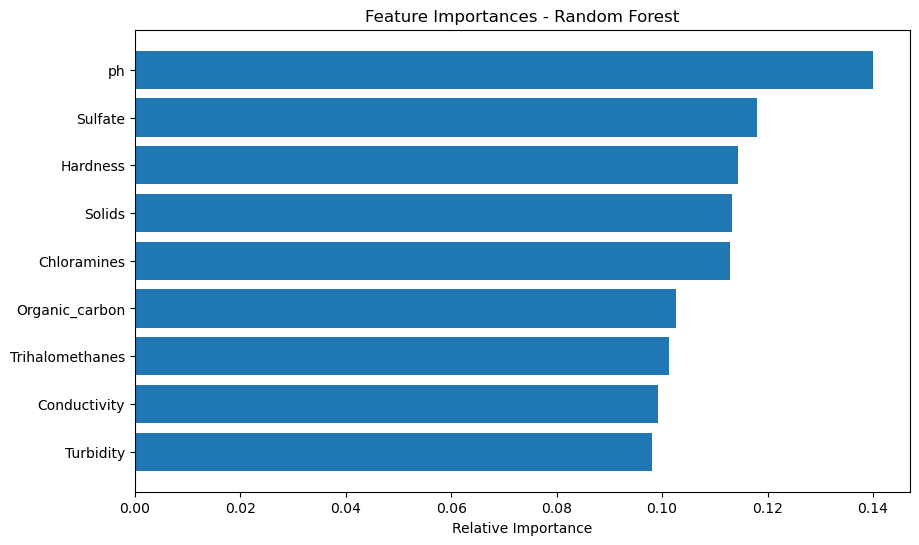

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef, roc_auc_score
from imblearn.over_sampling import ADASYN

# Import CatBoost and LightGBM
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# Load the dataset
water_potability_df = pd.read_csv('water_potability.csv')

# Get the number of rows and columns in the dataset
rows, columns = water_potability_df.shape

# Output the dimensions of the dataset
print(f"Dataset Dimensions: {rows} rows, {columns} columns")

# Preview the first few entries in the dataset to understand its structure and contents
print(water_potability_df.head())

# Data Preprocessing
# Handle missing values
imputer = SimpleImputer(strategy='mean')
water_potability_df_imputed = pd.DataFrame(imputer.fit_transform(water_potability_df), columns=water_potability_df.columns)

# Add target variable (potability) based on the provided column
# Note: Assuming 'Potability' column exists and it's our target
X = water_potability_df_imputed.drop('Potability', axis=1)
y = water_potability_df_imputed['Potability']

# Balance the dataset using ADASYN
ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(X, y)

# Split the balanced data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'CatBoost': CatBoostClassifier(silent=True),
    'LightGBM': LGBMClassifier()
}

# Function to evaluate models with additional metrics (Kappa, MCC, AUC)
def evaluate_models(models, X_train, y_train, X_test, y_test):
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        kappa = cohen_kappa_score(y_test, y_pred)
        mcc = matthews_corrcoef(y_test, y_pred)
        
        # Calculate AUC for models that support probability prediction
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test)[:, 1]
            auc = roc_auc_score(y_test, y_prob)
            print(f"Evaluation for {model_name} (without tuning):")
            print(f"Accuracy: {acc:.4f}")
            print(f"Precision: {prec:.4f}")
            print(f"Recall: {rec:.4f}")
            print(f"F1-Score: {f1:.4f}")
            print(f"Kappa: {kappa:.4f}")
            print(f"MCC: {mcc:.4f}")
            print(f"AUC: {auc:.4f}")
        else:
            print(f"Evaluation for {model_name} (without tuning):")
            print(f"Accuracy: {acc:.4f}")
            print(f"Precision: {prec:.4f}")
            print(f"Recall: {rec:.4f}")
            print(f"F1-Score: {f1:.4f}")
            print(f"Kappa: {kappa:.4f}")
            print(f"MCC: {mcc:.4f}")
        
        print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")
        print(f"Classification Report:\n{classification_report(y_test, y_pred)}\n")

# Hyperparameter tuning using RandomizedSearchCV
param_dist = {
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'KNN': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']},
    'Decision Tree': {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    'CatBoost': {'iterations': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'depth': [4, 6, 8]},
    'LightGBM': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'num_leaves': [31, 50, 100]}
}

# Function to perform RandomizedSearchCV and get best model
def tune_and_evaluate(models, param_dist, X_train, y_train, X_test, y_test):
    best_estimators = {}
    for model_name in models:
        print(f"Training {model_name}...")
        rand_search = RandomizedSearchCV(models[model_name], param_distributions=param_dist[model_name], n_iter=10, cv=5, scoring='accuracy', random_state=42)
        rand_search.fit(X_train, y_train)
        best_estimators[model_name] = rand_search.best_estimator_
        print(f"Best parameters for {model_name}: {rand_search.best_params_}")
        print(f"Best cross-validation score for {model_name}: {rand_search.best_score_}\n")
    
    for model_name, model in best_estimators.items():
        y_pred = model.predict(X_test)
        print(f"Evaluation for {model_name} (after tuning):")
        print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
        print(f"Precision: {precision_score(y_test, y_pred):.4f}")
        print(f"Recall: {recall_score(y_test, y_pred):.4f}")
        print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
        print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")
        print(f"Classification Report:\n{classification_report(y_test, y_pred)}\n")
    
    return best_estimators

# Evaluate models without tuning
evaluate_models(models, X_train, y_train, X_test, y_test)

# Tune and evaluate models
best_estimators = tune_and_evaluate(models, param_dist, X_train, y_train, X_test, y_test)

# Plot feature importances for the best RandomForest model
best_rf = best_estimators['Random Forest']
importances = best_rf.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title('Feature Importances - Random Forest')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


Dataset Dimensions: 3276 rows, 10 columns
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


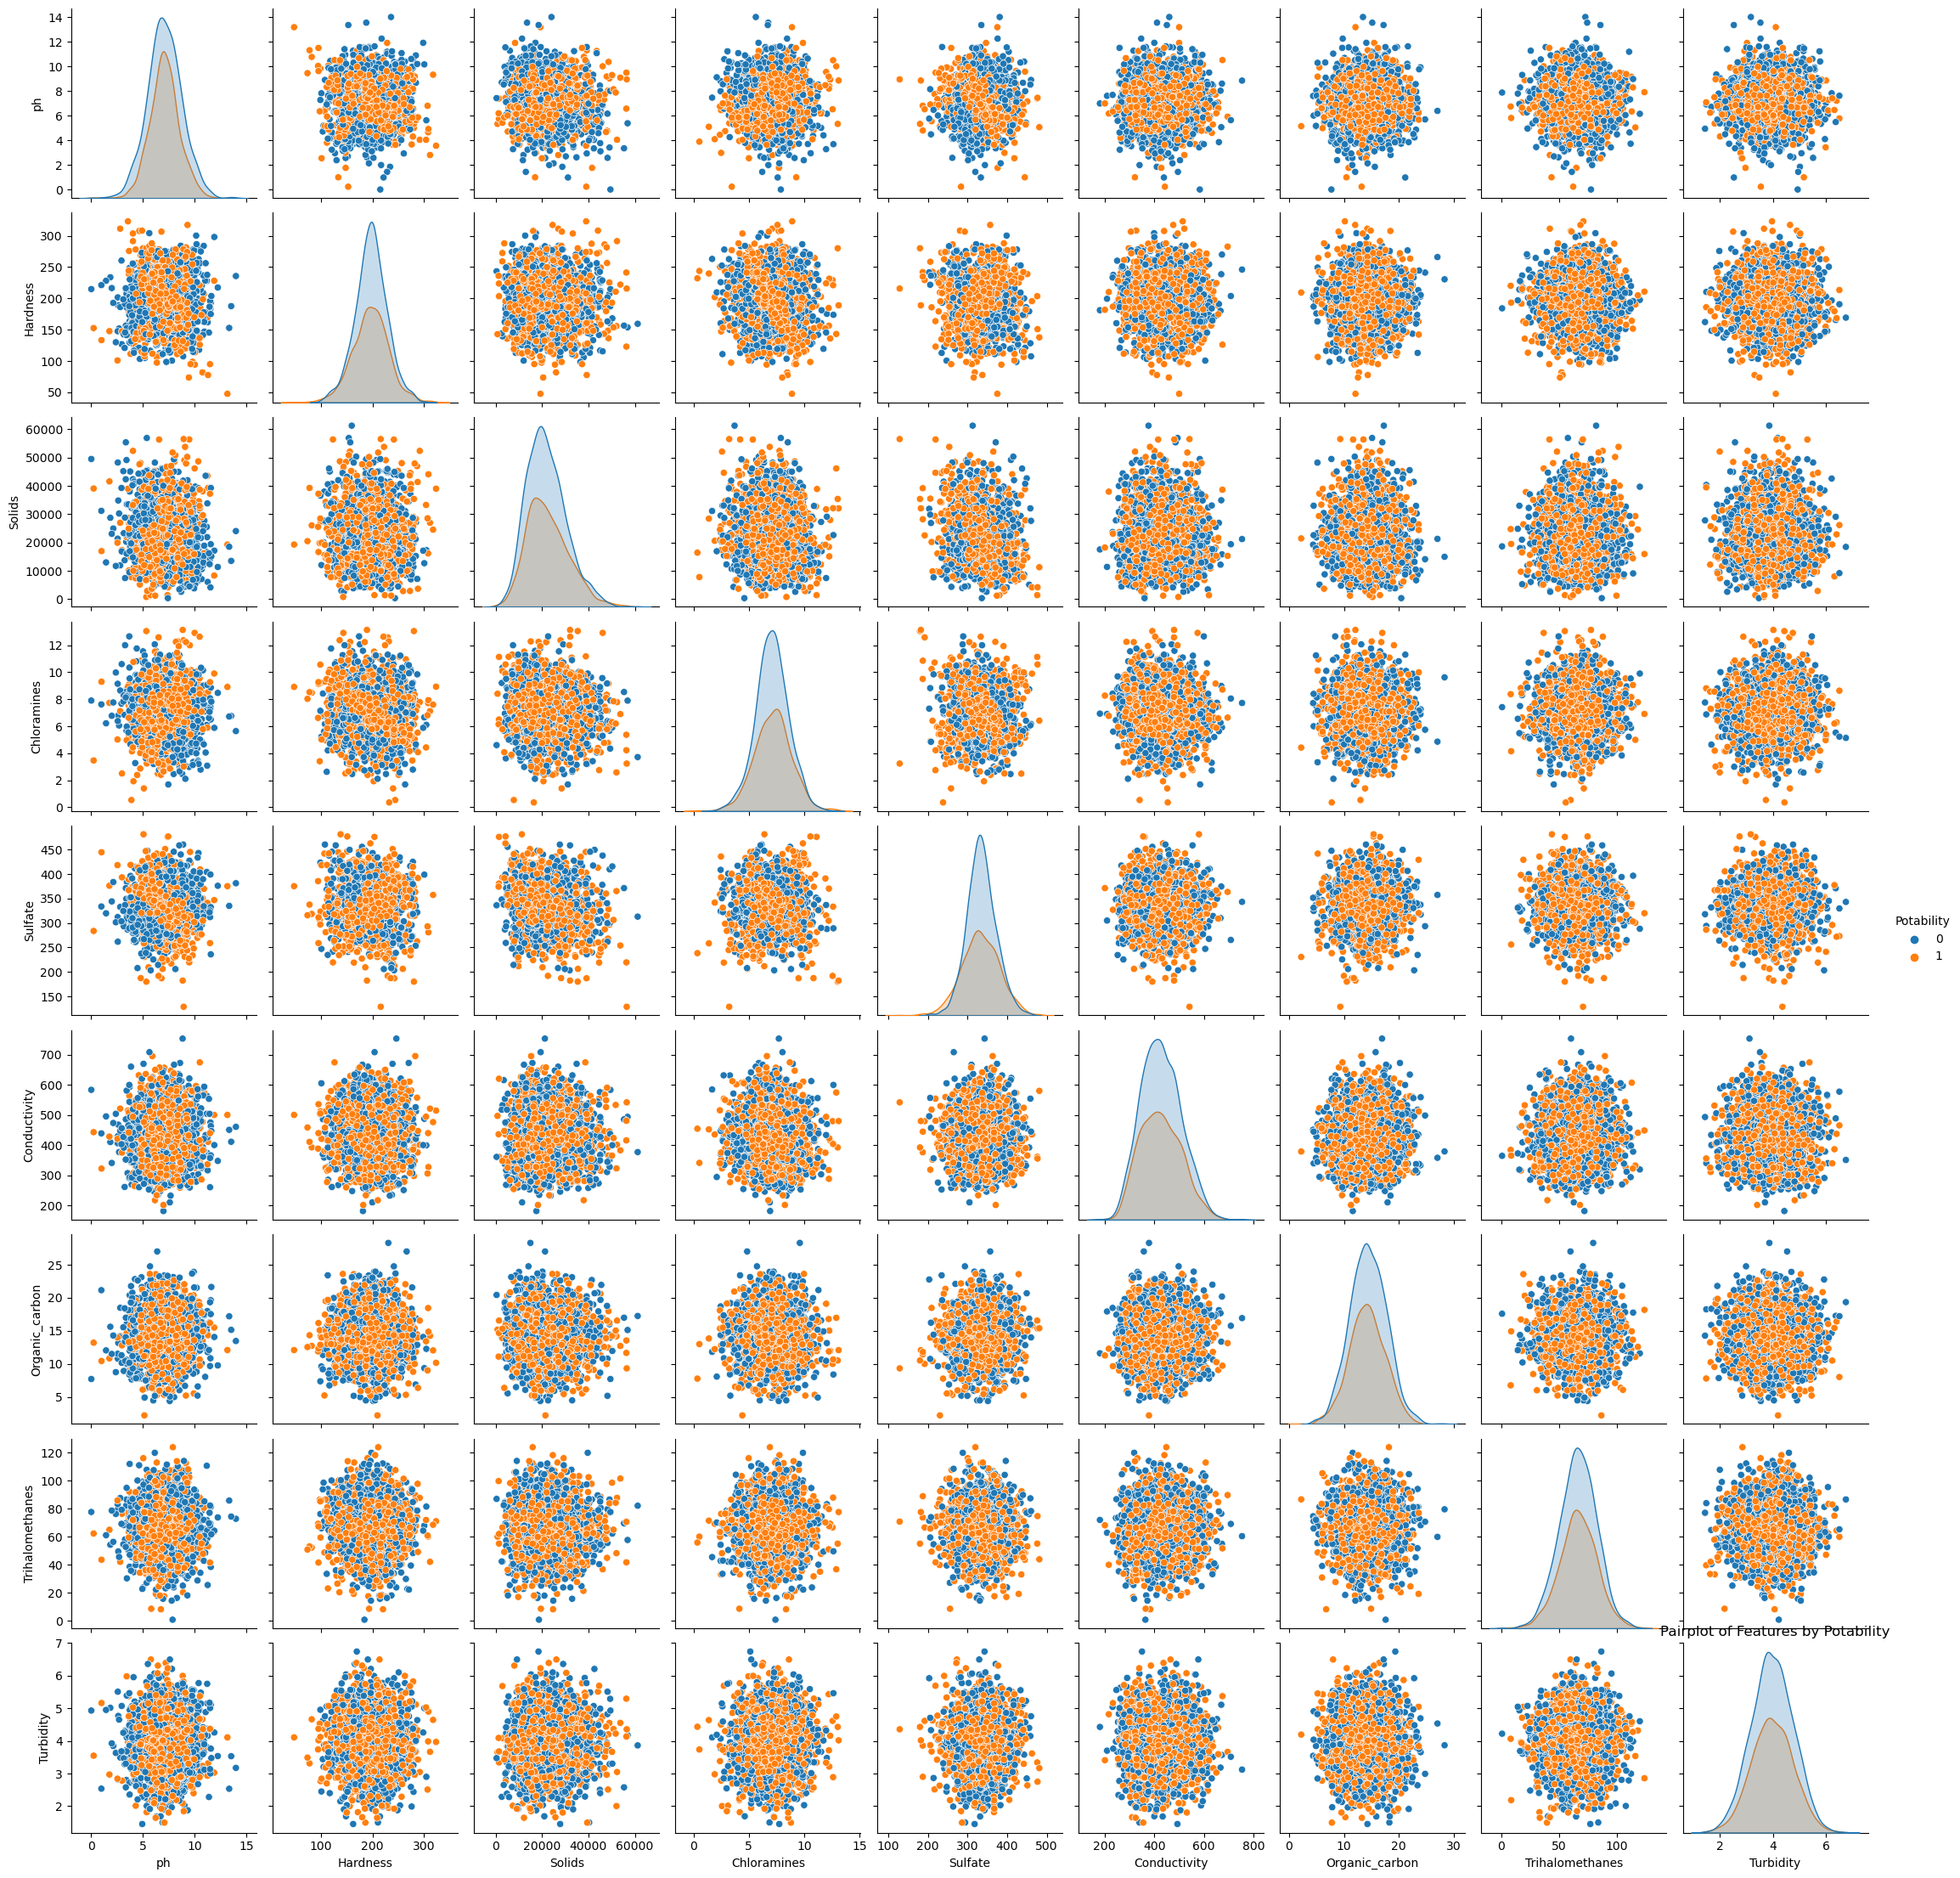

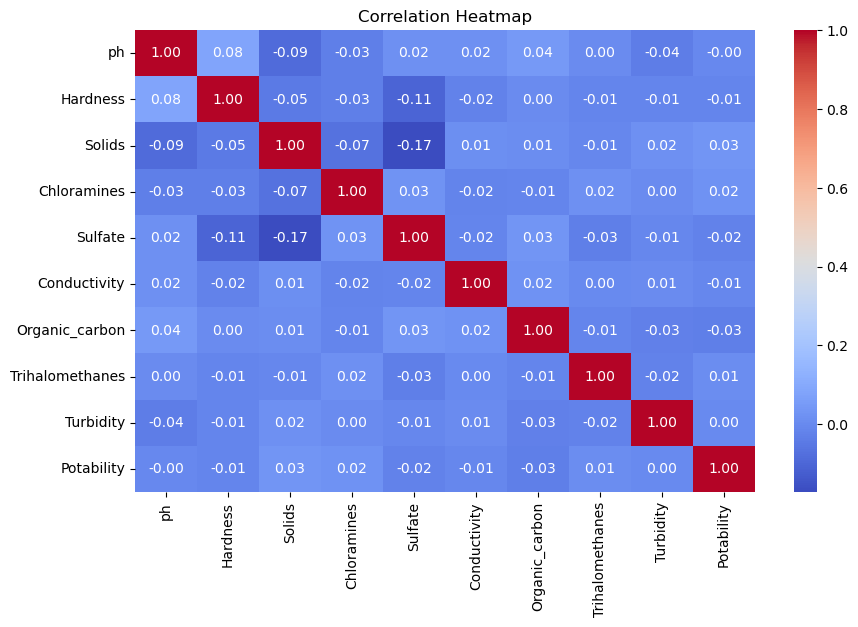

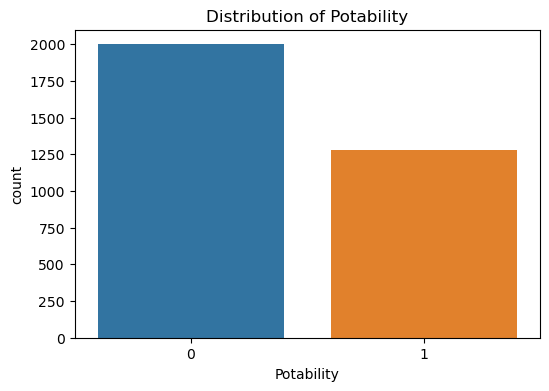

Selected Features: Index(['Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Organic_carbon'], dtype='object')
Evaluation for SVM:
Accuracy: 0.6621
Precision: 0.6269
Recall: 0.8030
F1-Score: 0.7041
Confusion Matrix:
[[211 194]
 [ 80 326]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.52      0.61       405
         1.0       0.63      0.80      0.70       406

    accuracy                           0.66       811
   macro avg       0.68      0.66      0.66       811
weighted avg       0.68      0.66      0.66       811


Evaluation for KNN:
Accuracy: 0.6819
Precision: 0.6498
Recall: 0.7906
F1-Score: 0.7133
Confusion Matrix:
[[232 173]
 [ 85 321]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.57      0.64       405
         1.0       0.65      0.79      0.71       406

    accuracy                           0.68       811
   macro avg       0.69      0.68      0.

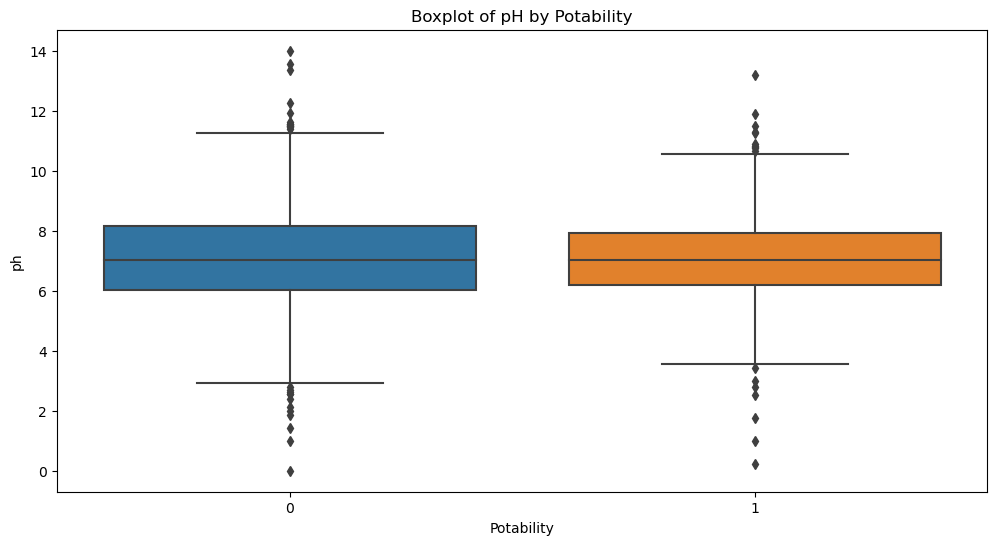

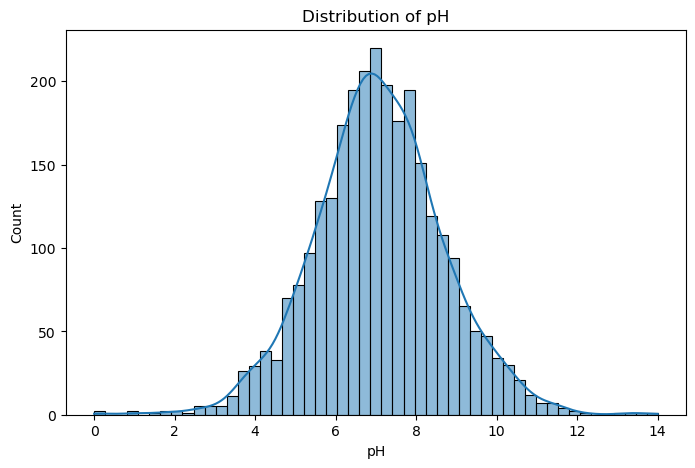

Selected Features: Index(['Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Organic_carbon'], dtype='object')
Evaluation for SVM:
Accuracy: 0.6621
Precision: 0.6269
Recall: 0.8030
F1-Score: 0.7041
Confusion Matrix:
[[211 194]
 [ 80 326]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.52      0.61       405
         1.0       0.63      0.80      0.70       406

    accuracy                           0.66       811
   macro avg       0.68      0.66      0.66       811
weighted avg       0.68      0.66      0.66       811


Evaluation for KNN:
Accuracy: 0.6819
Precision: 0.6498
Recall: 0.7906
F1-Score: 0.7133
Confusion Matrix:
[[232 173]
 [ 85 321]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.57      0.64       405
         1.0       0.65      0.79      0.71       406

    accuracy                           0.68       811
   macro avg       0.69      0.68      0.

In [48]:
import pandas as pd
import numpy as np

# Load the dataset
water_potability_df = pd.read_csv('water_potability.csv')

# Display dataset dimensions
rows, columns = water_potability_df.shape
print(f"Dataset Dimensions: {rows} rows, {columns} columns")

# Display the first few rows of the dataset
print(water_potability_df.head())

import matplotlib.pyplot as plt
import seaborn as sns

# Visualization 1: Pairplot
sns.pairplot(water_potability_df, hue='Potability', diag_kind='kde')
plt.title('Pairplot of Features by Potability')
plt.show()

# Visualization 2: Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(water_potability_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Visualization 3: Distribution of Potability
plt.figure(figsize=(6, 4))
sns.countplot(x='Potability', data=water_potability_df)
plt.title('Distribution of Potability')
plt.show()

# Visualization 4: Boxplot of Features by Potability
plt.figure(figsize=(12, 6))
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Handle missing values
imputer = SimpleImputer(strategy='mean')
water_potability_df_imputed = pd.DataFrame(imputer.fit_transform(water_potability_df), columns=water_potability_df.columns)

# Add target variable (potability)
X = water_potability_df_imputed.drop('Potability', axis=1)
y = water_potability_df_imputed['Potability']

# Standardize the features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


# Example of feature selection (you can customize this part)
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X_scaled, y)
selected_features = X.columns[selector.get_support()]
print(f"Selected Features: {selected_features}")

from imblearn.over_sampling import ADASYN

# Balance the dataset using ADASYN
ada = ADASYN(random_state=42)
X_resampled, y_resampled = ada.fit_resample(X_scaled, y)



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize models
models = {
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'CatBoost': CatBoostClassifier(silent=True),
    'LightGBM': LGBMClassifier()
}

# Evaluate models
def evaluate_models(models, X_train, y_train, X_test, y_test):
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(f"Evaluation for {model_name}:")
        print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
        print(f"Precision: {precision_score(y_test, y_pred):.4f}")
        print(f"Recall: {recall_score(y_test, y_pred):.4f}")
        print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
        print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")
        print(f"Classification Report:\n{classification_report(y_test, y_pred)}\n")

evaluate_models(models, X_train, y_train, X_test, y_test)
sns.boxplot(x='Potability', y='ph', data=water_potability_df)
plt.title('Boxplot of pH by Potability')
plt.show()

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize models
models = {
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'CatBoost': CatBoostClassifier(silent=True),
    'LightGBM': LGBMClassifier()
}

# Evaluate models
def evaluate_models(models, X_train, y_train, X_test, y_test):
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(f"Evaluation for {model_name}:")
        print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
        print(f"Precision: {precision_score(y_test, y_pred):.4f}")
        print(f"Recall: {recall_score(y_test, y_pred):.4f}")
        print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
        print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")
        print(f"Classification Report:\n{classification_report(y_test, y_pred)}\n")

evaluate_models(models, X_train, y_train, X_test, y_test)
sns.boxplot(x='Potability', y='ph', data=water_potability_df)
plt.title('Boxplot of pH by Potability')
plt.show()

# Visualization 5: Distribution of pH
plt.figure(figsize=(8, 5))
sns.histplot(data=water_potability_df, x='ph', kde=True)
plt.title('Distribution of pH')
plt.xlabel('pH')
plt.show()

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Handle missing values
imputer = SimpleImputer(strategy='mean')
water_potability_df_imputed = pd.DataFrame(imputer.fit_transform(water_potability_df), columns=water_potability_df.columns)

# Add target variable (potability)
X = water_potability_df_imputed.drop('Potability', axis=1)
y = water_potability_df_imputed['Potability']

# Standardize the features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


# Example of feature selection (you can customize this part)
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X_scaled, y)
selected_features = X.columns[selector.get_support()]
print(f"Selected Features: {selected_features}")

from imblearn.over_sampling import ADASYN

# Balance the dataset using ADASYN
ada = ADASYN(random_state=42)
X_resampled, y_resampled = ada.fit_resample(X_scaled, y)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize models
models = {
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'CatBoost': CatBoostClassifier(silent=True),
    'LightGBM': LGBMClassifier()
}

# Evaluate models
def evaluate_models(models, X_train, y_train, X_test, y_test):
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(f"Evaluation for {model_name}:")
        print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
        print(f"Precision: {precision_score(y_test, y_pred):.4f}")
        print(f"Recall: {recall_score(y_test, y_pred):.4f}")
        print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
        print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")
        print(f"Classification Report:\n{classification_report(y_test, y_pred)}\n")

evaluate_models(models, X_train, y_train, X_test, y_test)


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Handle missing values
imputer = SimpleImputer(strategy='mean')
water_potability_df_imputed = pd.DataFrame(imputer.fit_transform(water_potability_df), columns=water_potability_df.columns)

# Add target variable (potability)
X = water_potability_df_imputed.drop('Potability', axis=1)
y = water_potability_df_imputed['Potability']

# Standardize the features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


# Example of feature selection (you can customize this part)
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X_scaled, y)
selected_features = X.columns[selector.get_support()]
print(f"Selected Features: {selected_features}")

from imblearn.over_sampling import ADASYN

# Balance the dataset using ADASYN
ada = ADASYN(random_state=42)
X_resampled, y_resampled = ada.fit_resample(X_scaled, y)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize models
models = {
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'CatBoost': CatBoostClassifier(silent=True),
    'LightGBM': LGBMClassifier()
}

# Evaluate models
def evaluate_models(models, X_train, y_train, X_test, y_test):
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(f"Evaluation for {model_name}:")
        print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
        print(f"Precision: {precision_score(y_test, y_pred):.4f}")
        print(f"Recall: {recall_score(y_test, y_pred):.4f}")
        print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
        print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")
        print(f"Classification Report:\n{classification_report(y_test, y_pred)}\n")

evaluate_models(models, X_train, y_train, X_test, y_test)
